In [152]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
from math import log, e
import math
from sklearn.utils import shuffle
import os
import pickle
from scipy.stats import iqr
from sklearn.model_selection import train_test_split

In [153]:
my_data = genfromtxt('../Data/data_2/covtype.data', delimiter=',')

In [154]:
my_data.shape

(581012, 55)

In [155]:
for i in set(my_data[:,-1]) :
    _list = list(my_data[:,-1])
    c = _list.count(i)
    print('Class :', i,'| count :',c )

Class : 1.0 | count : 211840
Class : 2.0 | count : 283301
Class : 3.0 | count : 35754
Class : 4.0 | count : 2747
Class : 5.0 | count : 9493
Class : 6.0 | count : 17367
Class : 7.0 | count : 20510


In [156]:
# there are 7 classes 
# taking the majority class as normal and the class(es) with minimum number of points as anomalous
# this assumption has been done in CompreX

normal_class = 2
anomaly_class = [4 ,5 ,6 ]

In [157]:
df = pd.DataFrame(data=my_data)
print(list(df.columns))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]


0 Elevation / quantitative /meters / Elevation in meters 

1 Aspect / quantitative / azimuth / Aspect in degrees azimuth 

2 Slope / quantitative / degrees / Slope in degrees 

3 Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features

4 Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features 

5 Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway 

6 Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice 

7 Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice 

8 Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice 

9 Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points 

10-13 Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation 

14-53 Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation 

54 Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

In [158]:
# Join up columns 14 to 53

In [159]:
for c in range(14,53+1):
    df[c] = df[c].astype(int)

In [160]:
# join up column
# 14 to 54 is  soil type


df['soil_type'] = None
def join_14_53(row):
    r = list(row[list(range(14,54))])
    r = np.argmax(r)
    return r
    
df['soil_type'] = df.apply(join_14_53,axis=1)

In [161]:
len(set(df['soil_type']))

40

In [162]:
for r in list(range(14,54)):
    try:
        del df[r]
    except:
        pass

In [163]:

df['wa'] = None
def join_10_13(row):
    r = list(row[list(range(10,14))])
    r = np.argmax(r)
    return r
    
df['wa'] = df.apply(join_10_13,axis=1)

In [164]:
for r in list(range(10,14)):
    try:
        del df[r]
    except:
        pass

In [165]:
df_new = pd.DataFrame(df,copy=True)

In [166]:
df_new.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 54, 'soil_type', 'wa'], dtype='object')

In [167]:
bin_list = list(range(0,10))

In [168]:
for i in df_new.columns:
    vals = set(list(df_new[i]))
    print(len(vals), df_new[i].dtype)
    if str(df_new[i].dtype) == 'float64' and i in bin_list:
        print('--')
        print('>',len(set(df_new[i])))
        if len(set(df[i]))>2:
            bins = 25
            labels=list(range(0,bins))
            df_new[i] = pd.cut(df_new[i], bins,labels=labels)
            print('>',set(x))
        
        
        

1978 float64
--
> 1978
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
361 float64
--
> 361
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
67 float64
--
> 67
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
551 float64
--
> 551
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
700 float64
--
> 700
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
5785 float64
--
> 5785
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
207 float64
--
> 207
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
185 float64
--
> 185
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
255 float64
--
> 255
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
5827 float64
--
> 5827
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
7 float64
40 int64
4 int64


In [169]:
df_new = df_new.rename(columns = {54:'tag'})


In [173]:
# del df['tag']
df_new.head(3)

,0,1,2,3,4,5,6,7,8,9,tag,soil_type,wa
0,9,3,1,4,5,1,21,22,14,21,5.0,28,0
1,9,3,0,3,5,1,21,23,14,21,5.0,28,0
2,11,9,3,4,7,11,23,23,13,21,2.0,11,0


In [174]:
for i in set(df_new['tag']) :
    _list = list(df_new['tag'])
    c = _list.count(i)
    print('Class :', i,'| count :',c )

Class : 1.0 | count : 211840
Class : 2.0 | count : 283301
Class : 3.0 | count : 35754
Class : 4.0 | count : 2747
Class : 5.0 | count : 9493
Class : 6.0 | count : 17367
Class : 7.0 | count : 20510


In [176]:
df_1 = df_new.loc[df_new['tag'].isin(anomaly_class)]
df_2 = df_new.loc[df_new['tag'].isin([normal_class])].sample(60000)
df_new_1 = df_1.append(df_2,ignore_index=True)


In [177]:
df_new_1.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'tag', 'soil_type', 'wa'], dtype='object')

In [178]:
def entropy_calc(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.
    base = math.e 
    for i in probs:
        ent -= i * log(i, base)
    k = len(value)
    ent = ent/log(k,base)
    return ent

In [179]:
def get_entropies(df):
    # ignore 1st and last columns
    num_cols = len(df.columns)
    res = {}
    
    for i in df.columns:  
        if i != 'tag':
            e = entropy_calc(list(df[i]))
            print(i,e)
            res[i] = e
    return res

attr_entropy = get_entropies(df_new_1)


attr_list = []
lb = 0.0
ub = 1.0
attr_list = []
for k,v in attr_entropy.items():
    if v > lb and v < ub:
        attr_list.append(k)

print('Valid attributes', attr_list)

0 0.8747377506056065
1 0.9774732117855935
2 0.7556773144634926
3 0.7608506441487143
4 0.5678082995287996
5 0.8858682067412766
6 0.7486129689364516
7 0.663540917857357
8 0.8704231935417909
9 0.8330581479452219
soil_type 0.7730958757520445
wa 0.7870677772792736
Valid attributes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'soil_type', 'wa']


In [180]:
attr_list =  list(attr_list + ['tag'])
df_new_1 = df_new_1[attr_list]
df_new_1.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'soil_type', 'wa', 'tag'], dtype='object')

In [181]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]

# -------------------- #
def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}
    
    _idx = 0
    for col in cols:
        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}
        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[_idx] = len(id2val_dict)
        _idx += 1 
    domain_dims = list(domain_dims_dict.values())
    domain_dims_res = domain_dims_dict

    domain_dims =  np.array(domain_dims)
    print(domain_dims)
    print(domain_dims_res)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [182]:
save_dir = '../Data/data_2'

In [183]:
_columns = list(df_new_1.columns)
try:
    _columns.remove('tag')
except:
    pass

In [184]:
# ------------------------------------- #
# convert all values to int

for c in list(_columns):
    df_new_1[c] = df_new_1[c].astype(str)  

In [185]:
df_new_1.head(10)

,0,1,2,3,4,5,6,7,8,9,soil_type,wa,tag
0,9,3,1,4,5,1,21,22,14,21,28,0,5.0
1,9,3,0,3,5,1,21,23,14,21,28,0,5.0
2,9,3,0,2,5,1,21,23,14,21,28,0,5.0
3,9,3,2,4,5,2,21,22,13,21,28,0,5.0
4,9,3,1,4,5,2,21,22,14,21,28,0,5.0
5,9,3,3,4,7,2,21,21,13,21,28,0,5.0
6,9,4,3,4,5,2,22,21,12,21,28,0,5.0
7,9,13,1,3,7,2,21,23,15,21,17,0,5.0
8,9,14,2,2,7,2,20,24,16,21,17,0,5.0
9,8,10,1,1,5,2,22,23,14,19,17,0,5.0


# ADD in ID

In [186]:
# add in id
new_col = list(range(1,len(df_new_1)+1))
try: 
    df_new_1.insert(
        loc=0, 
        column='id', 
        value=new_col
    )
except:
    pass

In [187]:
df_new_1.columns

Index(['id', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'soil_type', 'wa', 'tag'], dtype='object')

In [188]:

normal_df = pd.DataFrame(df_new_1[df_new_1['tag']==normal_class],copy=True)
len(normal_df)

60000

In [189]:
# get anomalies
tmp_df = pd.DataFrame(df_new_1[df_new_1['tag'].isin(anomaly_class)],copy=True)
all_anomalies_df = pd.DataFrame(tmp_df,copy=True)
len(all_anomalies_df)

29607

In [190]:
normal_df = normal_df.sample(frac=1)
# do a 85-15 split 
test_fac = 0.10
anomaly_frac = 0.075
num_CV = 5
train_x_file = 'train_x.pkl'

In [191]:
_df_1 = pd.DataFrame(normal_df,copy=True)
training_data, test_normal_df = train_test_split(_df_1, test_size=test_fac)
print(len(training_data),len(test_normal_df))
train_x_id = list(training_data['id'])

54000 6000


In [192]:
for i in range(num_CV):
    idx = i+1
    print('---')
    print(idx)
    
#     _df_1 = pd.DataFrame(df,copy=True)
#     training_data, test_normal_df = train_test_split(_df_1, test_size=test_fac)
#     print(len(training_data),len(test_normal_df))
    
    num_anom = int(anomaly_frac*(len(test_normal_df)))
    print(num_anom)
    
    _df = pd.DataFrame(
        test_normal_df,
        copy=True
    )
    print('Len of test set, without anomalies', len(_df))
    
    tmp = all_anomalies_df.sample(num_anom)
    _df = _df.append(tmp, ignore_index=True)
    print('Len of test set, with anomalies', len(_df) )
    
    test_all_ids = list(_df['id'])
    
    # ids of anomaly cases
    test_anomaly_ids = tmp['id']
    print('Size of set of anomalies + test', len(set(test_all_ids)))
    
    try:
        del _df['tag']
        del _df['id']
    except:
        pass
    
    test_x_data = _df.values
    test_x_file = 'test_x_' + str(idx) + '.pkl'
    test_x_file_path = os.path.join(save_dir,test_x_file)
    print(test_x_file_path)
    
    with open(test_x_file_path, 'wb') as fh:
        _td = [test_anomaly_ids, test_all_ids, test_x_data ]
        pickle.dump(
            _td, 
            fh, 
            pickle.HIGHEST_PROTOCOL
        )
    
    print(' Set vs list  of test ids :: ', len(set(test_all_ids)), len(test_all_ids) )
#     z_tmp = list(train_x_id)
#     z_tmp.extend(test_all_ids)
#     print(' >>> ', len(set(z_tmp)))
        
    if i == 0:
        
        try:
            del training_data['id']
            del training_data['tag']
        except:
            pass
        
        # Save the data
        train_x_data = training_data.values
        train_x_file_path = os.path.join(
            save_dir,
            train_x_file
        )
        print(train_x_file)
        with open(train_x_file_path, 'wb') as fh:
            pickle.dump(
                train_x_data, 
                fh, 
                pickle.HIGHEST_PROTOCOL
            )
        train_x_id_file = 'train_x_id.pkl'
        train_x_id_file_path = os.path.join(save_dir,train_x_id_file)
        with open(train_x_id_file_path, 'wb') as fh:
            pickle.dump(
                train_x_id, 
                fh, 
                pickle.HIGHEST_PROTOCOL
            )    
        

---
1
450
Len of test set, without anomalies 6000
Len of test set, with anomalies 6450
Size of set of anomalies + test 6450
../Data/data_2/test_x_1.pkl
 Set vs list  of test ids ::  6450 6450
train_x.pkl
---
2
450
Len of test set, without anomalies 6000
Len of test set, with anomalies 6450
Size of set of anomalies + test 6450
../Data/data_2/test_x_2.pkl
 Set vs list  of test ids ::  6450 6450
---
3
450
Len of test set, without anomalies 6000
Len of test set, with anomalies 6450
Size of set of anomalies + test 6450
../Data/data_2/test_x_3.pkl
 Set vs list  of test ids ::  6450 6450
---
4
450
Len of test set, without anomalies 6000
Len of test set, with anomalies 6450
Size of set of anomalies + test 6450
../Data/data_2/test_x_4.pkl
 Set vs list  of test ids ::  6450 6450
---
5
450
Len of test set, without anomalies 6000
Len of test set, with anomalies 6450
Size of set of anomalies + test 6450
../Data/data_2/test_x_5.pkl
 Set vs list  of test ids ::  6450 6450


# ------------------------------------------------------- #

In [198]:
attr_entropy_x = [str(_) for _ in attr_entropy.keys()]
attr_entropy_y = [_ for _ in attr_entropy.values()]

In [199]:
attr_entropy_x

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'soil_type', 'wa']

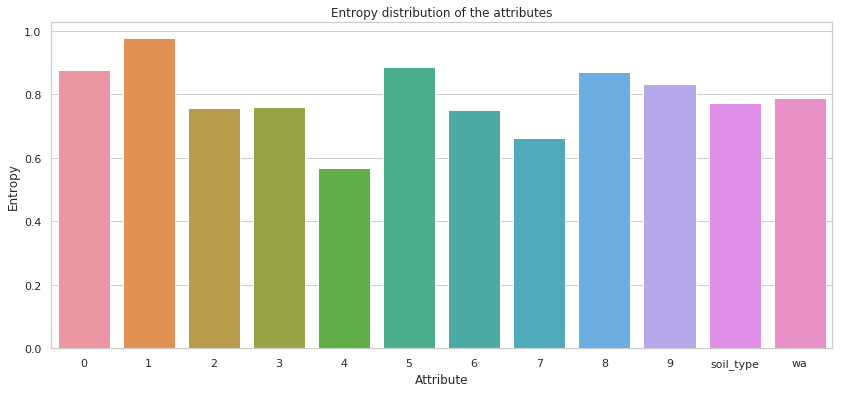

In [200]:
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=attr_entropy_x, y=attr_entropy_y)
plt.xlabel('Attribute')
plt.ylabel('Entropy')
plt.title('Entropy distribution of the attributes')
plt.show()

In [203]:
def get_domain_arity(df,attr_list):
    try:
        attr_list.remove(tag)
    except:
        pass
    domain_arity = {a: len(set(df[a])) for a in attr_list}
    return domain_arity

In [210]:
domain_arity = get_domain_arity(df_new_1,attr_list)
del domain_arity['tag']

In [211]:
arity_x = [str(_) for _ in domain_arity.keys()]
arity_y = [_ for _ in domain_arity.values()]


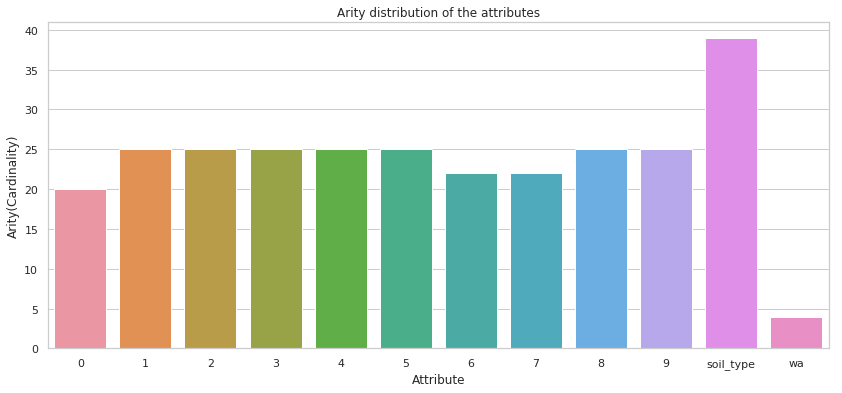

In [212]:

plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=arity_x, y=arity_y)
plt.xlabel('Attribute')
plt.ylabel('Arity(Cardinality)')
plt.title('Arity distribution of the attributes')
plt.show() 

In [43]:


data_df = df[(df['tag']==normal_class)] 
anom = df[(df['tag'].isin(anomaly_class)].sample(int(len(data_df)*0.04))
data_df = data_df.append(anom)

In [8]:
len(data_df)

26000

In [9]:
l1 = len(data_df[data_df['tag']==normal_class])
l2 = len(data_df)
l1 = l2-l1
print('Percentage of Anomalies :',  (l1/l2)*100 )

Percentage of Anomalies : 3.8461538461538463


In [10]:
# add in id
new_col = list(range(1,len(data_df)+1))
data_df.insert(loc=0, column='id', value=new_col)

### Exploring the attributes


In [11]:
def entropy_calc(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.
    base = math.e 
    for i in probs:
        ent -= i * log(i, base)
    k = len(value)
    ent = ent/log(k,base)
    return ent

In [12]:
def get_entropies(df):
    # ignore 1st and last columns
    num_cols = len(df.columns)
    res = {}
    for i in range(1,num_cols-2):
        e = entropy_calc(list(df[i]))
        print(i,e)
        res[i] = e
    return res

In [13]:
attr_entropy = get_entropies(data_df)


1 0.9764318066342891
2 0.8373090736436817
3 0.7994998473774113
4 0.8133944743221604
5 0.9598079380566528
6 0.8770565182026996
7 0.8582591642483927
8 0.9113486488160762
9 0.9408376659796021
10 0.9998766417897046
11 0.42297549123463085
12 0.9777356620387453
13 0.06828928328809253
14 0.00662370995677137
15 0.015872215234077232
16 0.0291415209663476
17 0.027190816190378067
18 0.001162220273384513
19 0.009856741976947624
20 0
21 0.004478796109459097
22 0.008667262346201701
23 0.06181658135864357
24 0.04658616033034627
25 0.09230617098762421
26 0.10271485440477879
27 0.003581138048722643
28 0
29 0.03515553164983692
30 0.044826397303541723
31 0.008667262346201701
32 0.08459396164489305
33 0.12582047166305507
34 0.03884274422633769
35 0.528365037565347
36 0.6456880148356883
37 0.2855794856731306
38 0.009462938291540563
39 0.0180201424511988
40 0.026863017440049042
41 0.002651317734468217
42 0.7041990496053215
43 0.2473830208198693
44 0.31088696308984537
45 0.45916539401413164
46 0.410927412944

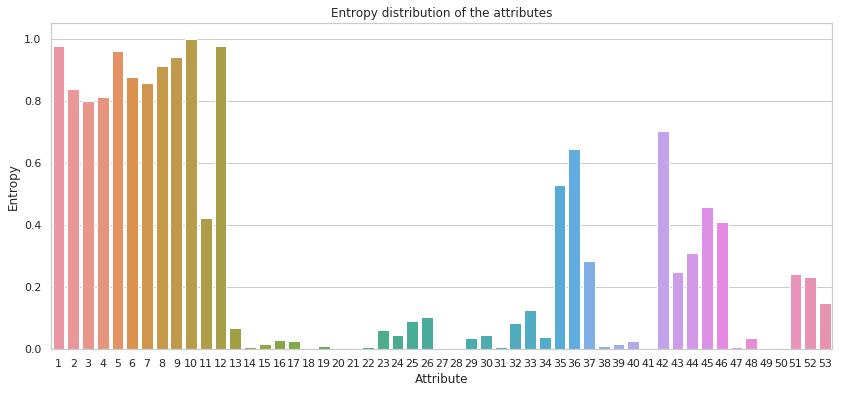

In [14]:
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(attr_entropy.keys()), y=list(attr_entropy.values()))
plt.xlabel('Attribute')
plt.ylabel('Entropy')
plt.title('Entropy distribution of the attributes')
plt.show()

## Filter attributes by threshold
### lb =0.05
### ub =0.95


In [15]:

lb = 0.01
ub = 0.99
attr_list = []
for k,v in attr_entropy.items():
    if v >= lb and v<= ub:
        attr_list.append(k)
        

In [16]:
len(attr_list)

38

In [17]:
valid_attr = ['id']
valid_attr.extend(attr_list)
valid_attr.append('tag')
data_df = data_df[valid_attr]

## Explore Arity of the domains

In [18]:
def get_domain_arity(df,attr_list):
    domain_arity = {a: len(set(df[a])) for a in attr_list}
    return domain_arity

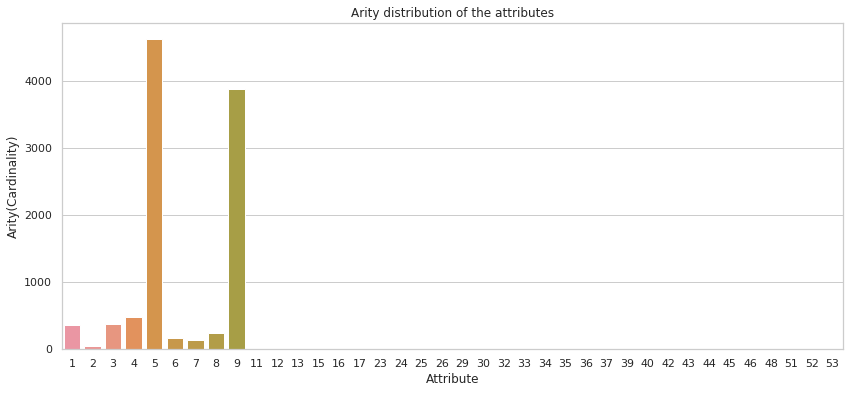

In [19]:
domain_arity = get_domain_arity(data_df,attr_list)
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(domain_arity.keys()), y=list(domain_arity.values()))
plt.xlabel('Attribute')
plt.ylabel('Arity(Cardinality)')
plt.title('Arity distribution of the attributes')
plt.show()  

In [20]:
domain_arity

{1: 361,
 2: 51,
 3: 381,
 4: 476,
 5: 4637,
 6: 173,
 7: 140,
 8: 243,
 9: 3891,
 11: 2,
 12: 2,
 13: 2,
 15: 2,
 16: 2,
 17: 2,
 23: 2,
 24: 2,
 25: 2,
 26: 2,
 29: 2,
 30: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 39: 2,
 40: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 48: 2,
 51: 2,
 52: 2,
 53: 2}

In [33]:

# Save the data ina numpy array
_tmp = data_df[data_df['tag'] == normal_class]
_normal = list(_tmp['id'])


_tmp = data_df[(data_df['tag'] == anomaly_class_1) | (data_df['tag'] == anomaly_class_2)]
_anomaly =  list(_tmp['id'])



In [34]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]


def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}

    for col in cols:

        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}

        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[col] = len(id2val_dict)

    domain_dims = []
    domain_dims_res = {}

    for col in list(df.columns):
        if col in domain_dims_dict.keys():
            print(col)
            domain_dims_res[col] = domain_dims_dict[col]
            domain_dims.append(domain_dims_dict[col])

    domain_dims =  np.array(domain_dims)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [35]:
all_ids = list(data_df['id'])
record_id_dict ={
    'all':all_ids,
    'normal':_normal,
    'anomaly':_anomaly
}

In [36]:
save_dir = '../Data/data_2'

data_df_1 = pd.DataFrame(data_df,copy=True)
try:
    del data_df_1['id']
    del data_df_1['tag']
except:
    pass

# convert all values to int
for c in list(data_df_1.columns):
    data_df_1[c] = data_df_1[c].astype(int)  
cols = list(data_df_1.columns)
convert_to_ids(data_df_1, cols , save_dir)
data_x = data_df_1.values
    

1
2
3
4
5
6
7
8
9
11
12
13
15
16
17
23
24
25
26
29
30
32
33
34
35
36
37
39
40
42
43
44
45
46
48
51
52
53


In [37]:
OP_PATH = '../Data/data_2'
data_x_file = 'data_2_x.pkl'
record_file = 'data_2_idList.pkl'

f_path_1 = os.path.join(OP_PATH,data_x_file)
f_path_2 = os.path.join(OP_PATH,record_file)

with open(f_path_1,'wb') as fh :
    pickle.dump(data_x, fh,pickle.HIGHEST_PROTOCOL)
    
with open(f_path_2,'wb') as fh :
    pickle.dump(record_id_dict, fh,pickle.HIGHEST_PROTOCOL)
    

numpy.ndarray